In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import ftplib
import os
import imageio.v3 as iio
import datetime

In [2]:
#define start end time, start with few days in august with hourly resolution
#1st it is 1st day, end loop next day     i is 1 day 

# Define start and end dates
start = datetime.date(2020, 6, 1)
end = datetime.date(2020, 8, 1)

# Define step size 
i = datetime.timedelta(days=30)

TypeError: No numeric data to plot.

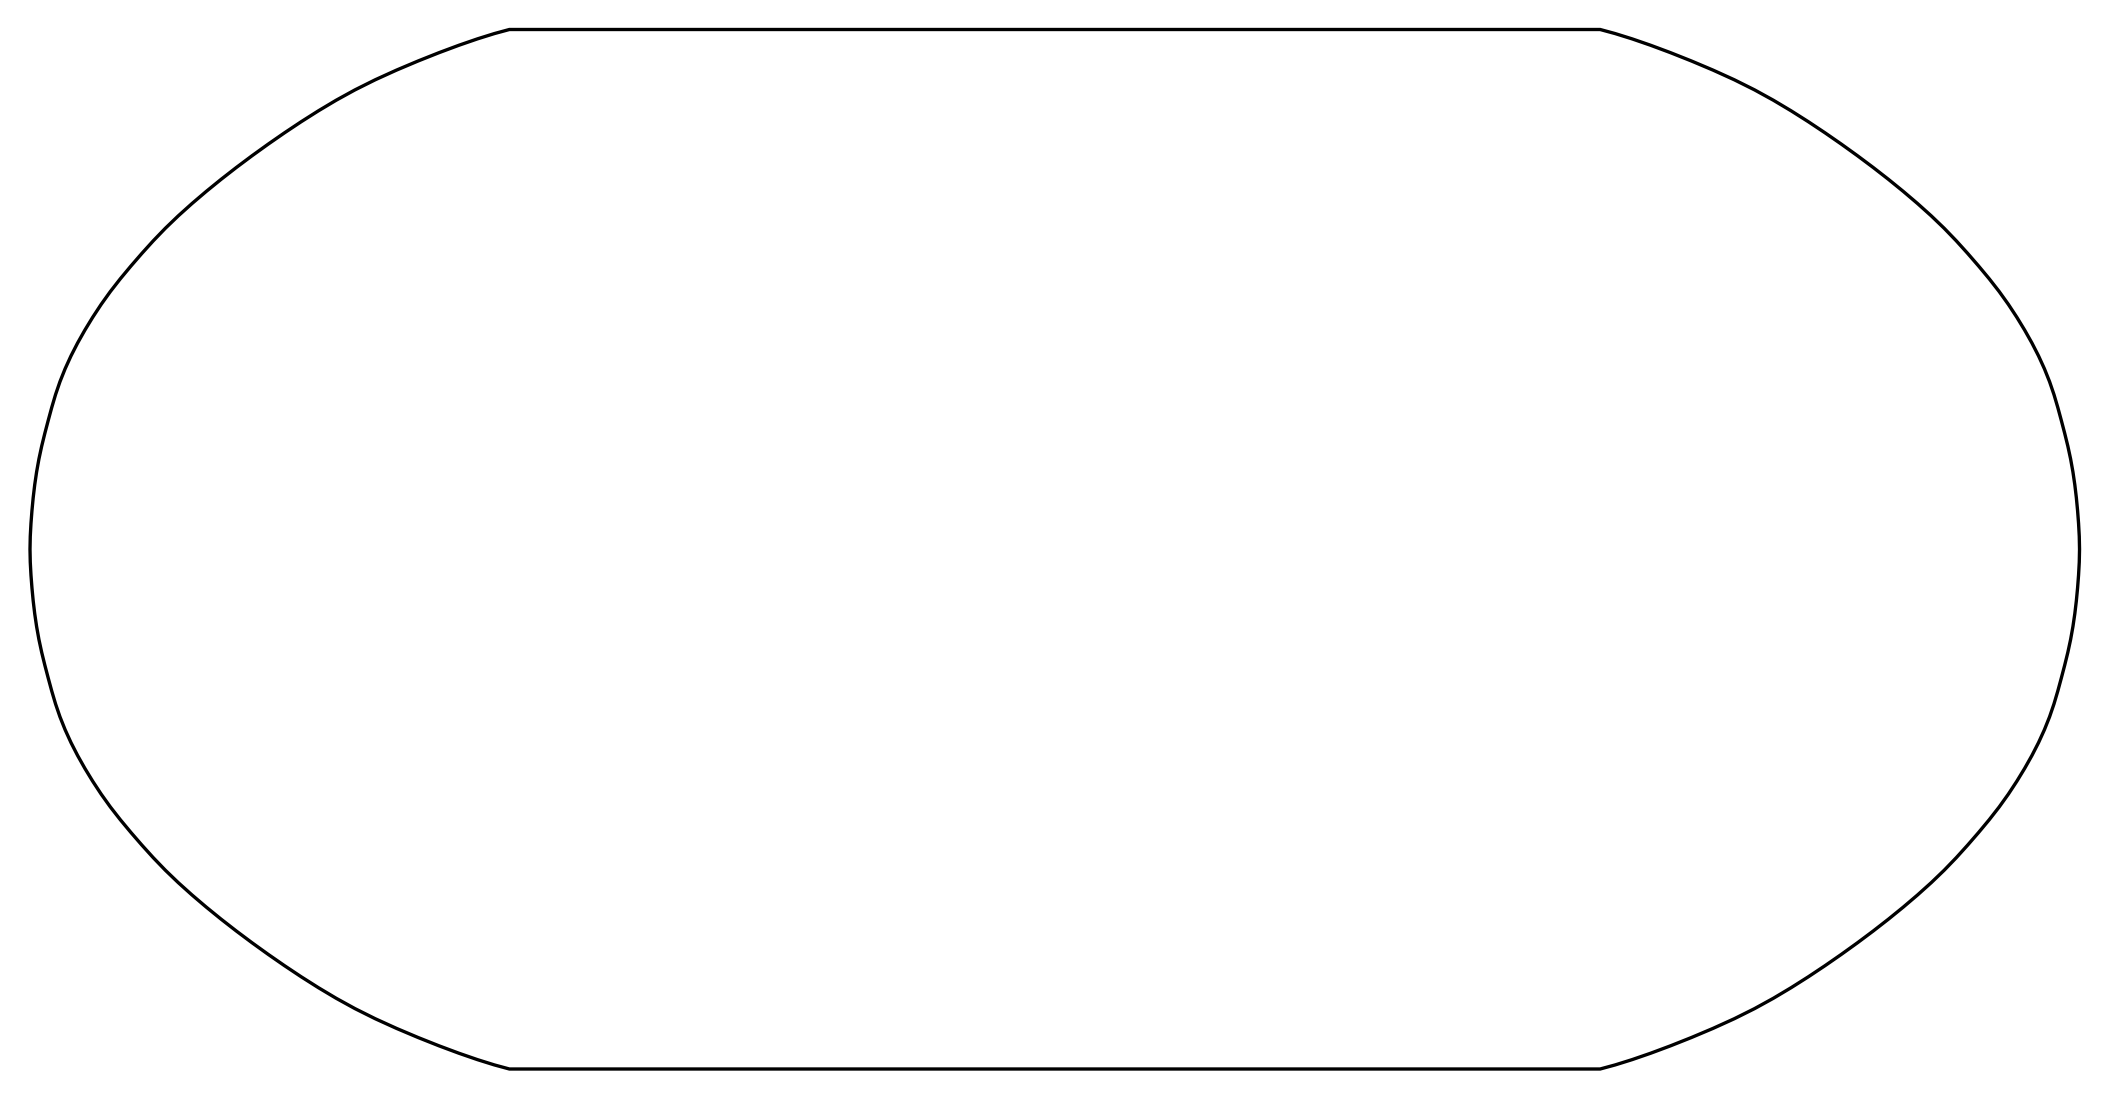

In [3]:
# load data
d = xr.open_dataset('/Users/colepietsch/Documents/EV333_AtmosphericDynamics/LabData/ERA5_monthly_tp_regrid.nc')

#create loop
while start <= end :

    #subset data to average over i 
    d = d.isel(time=(d.time.dt.strftime('%Y-%m-%d') == start))
    
    #choosing data vis parameters and projection
    cmap = cmocean.cm.rain
    lev = np.arange(0, 20, 0.5)
    proj = ccrs.Robinson(central_longitude=180)

    # define figure and axes, figure size, and resolution (300 dpi))
    fig = plt.figure(figsize=(9, 4.5), dpi=300)
    ax = plt.axes(projection = proj)

    # filled contour map of mean temperature
    d['tp'].plot.contourf(
        x = 'lon',
        y = 'lat',
        ax=ax,
        transform=ccrs.PlateCarree(),
        levels=lev,
        extend='both',
        colors=cmap,
        add_colorbar=True)

    # add coastlines
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.coastlines(
        resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

    # add grid lines
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=1,
                      color='gray',
                      alpha=0.5,
                      linestyle='--')

    # add title
    ax.set_title("Test")

    # save figure 
    fig.savefig('rivers_test_' + start + '.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

    #adding i to advance to next frame
    start += i 



In [4]:
d

<xarray.Dataset>
Dimensions:  (time: 0, lon: 90, lat: 46)
Coordinates:
  * time     (time) datetime64[ns] 
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
Data variables:
    tp       (time, lat, lon) float32 ...

In [12]:
## Working version 

#getting frames and removing nonframes
path = '/Users/colepietsch/Documents/EV333_AtmosphericDynamics/Rivers/atmorivers'
filenames = os.listdir(path)
filenames = [filename for filename in filenames if filename.endswith('.png')]

#creating array
images = [ ]

#setting loop
for filename in filenames:
  images.append(iio.imread(filename))

iio.imwrite('rivers_test.gif', images, duration = 500, loop = 0)


ValueError: all input arrays must have the same shape

In [ ]:
## codedex version


filenames = ['team-pic1.png', 'team-pic2.png']
images = [ ]

for filename in filenames:
  images.append(iio.imread(filename))

iio.imwrite('team.gif', images, duration = 500, loop = 0)


In [ ]:
## stack version

png_dir = '../animation/png'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(10):
    images.append(imageio.imread(file_path))

imageio.mimsave('../animation/gif/movie.gif', images)